In [154]:
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use('ggplot')

In [41]:
data = pd.read_csv("C:/Datasets/Language Detection.csv")

In [42]:
print("Data shape :", data.shape)
data.head(10)

Data shape : (10337, 2)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [43]:
languages = data['Language'].unique()
dt = []
for language in languages:
    r = random.randint(0,20)
    text = data[data.Language == language].iloc[r].Text
    dt.append((text, language))

df = pd.DataFrame(dt, columns=['Text', 'Language'])
df

,Text,Language
0,"Although humans are part of nature, human acti...",English
1,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam
2,मीड़याविकी को GNU जनरल पब्लिक लाइसेंस के तहत ल...,Hindi
3,"[14] சாங்கர் அவர்கள், விக்கிப்பீடியா என்ற சொல்...",Tamil
4,"Em cada edição há editoriais, notícias e artig...",Portugeese
5,Le mot nature est attesté en français depuis 1...,French
6,Kenmerkend voor het project en het succes erva...,Dutch
7,[3]​ Para la mayoría de los científicos public...,Spanish
8,Γράφεται και αναπτύσσεται συνεργατικά από εθελ...,Greek
9,"С 2005 года журнал публикует подкасты, где вкр...",Russian


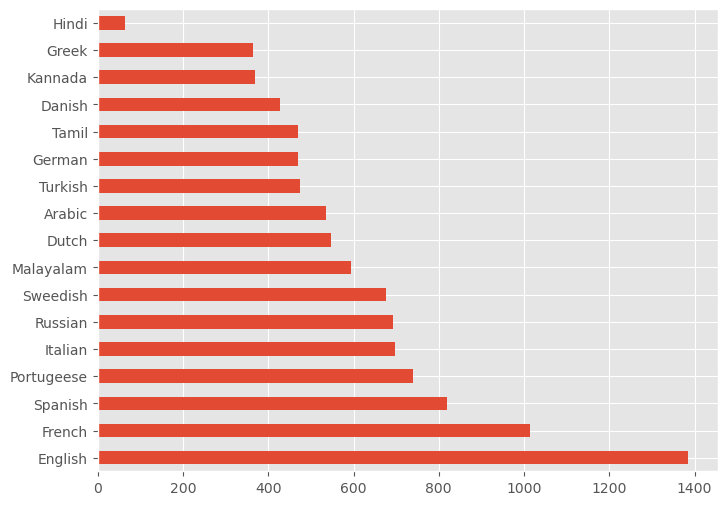

In [48]:
plt.figure(figsize = (8,6))
data['Language'].value_counts().plot(kind = 'barh')
plt.show()

In [49]:
X = data['Text']
y = data['Language']

In [54]:
Label_encoder = LabelEncoder()
y = Label_encoder.fit_transform(y)

In [121]:
preprocessed_text = []
for text in X:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[ [ ]', ' ', text)
    text = re.sub(r'[ ] ]', ' ', text)
    text = re.sub(r'[\n]', ' ', text)
    text = text.rstrip().lstrip()
    text = text.lower()
    preprocessed_text.append(text)

In [124]:
CV = CountVectorizer()
X = CV.fit_transform(preprocessed_text).toarray()
X.shape

(10337, 39404)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (8269, 39404)
X_test shape : (2068, 39404)
y_train shape : (8269,)
y_test shape : (2068,)


In [129]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [130]:
y_pred = model.predict(X_test)

In [135]:
accuracy_score_ = accuracy_score(y_test, y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)

print("Accuracy of the model :", accuracy_score_)

Accuracy of the model : 0.9782398452611218


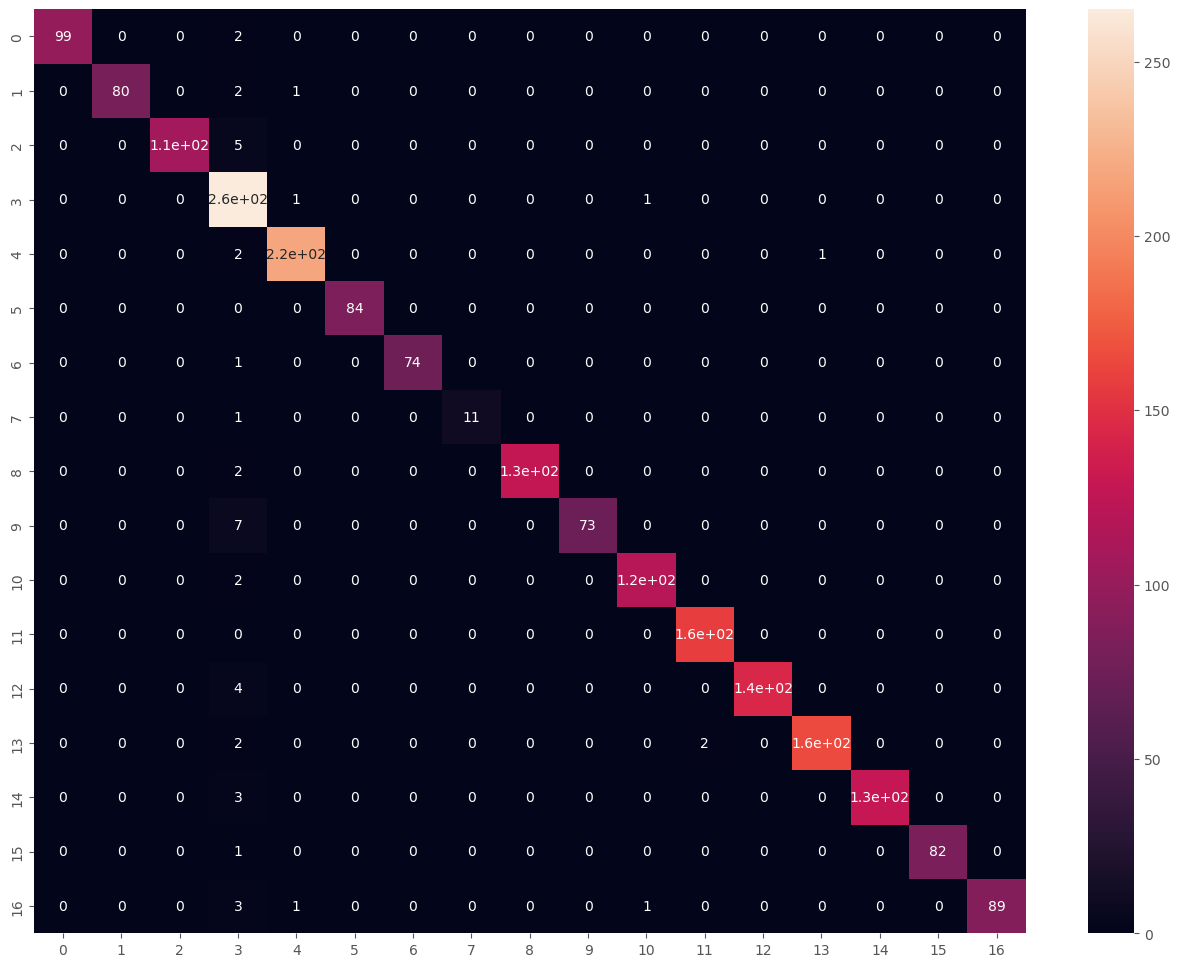

In [140]:
plt.figure(figsize = (16,12))
sns.heatmap(confusion_matrix_, annot = True)
plt.show()

In [158]:
def predict(text):
    x = CV.transform([text]).toarray()
    language = model.predict(x)
    language = Label_encoder.inverse_transform(language)
    print(f"The language is in {language[0]}.")

In [149]:
Text1 = "the weather today is amazing"
predict(Text1)

The language is in English.


In [150]:
Text2 = "le temps aujourd'hui est incroyable"
predict(Text2)

The language is in French.


In [151]:
Text3 = "الطقس اليوم رائع"
predict(Text3)

The language is in Arabic.


In [152]:
Text4 = "मौसम आज अद्भुत है"
predict(Text4)

The language is in Hindi.
